In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
resume_data = pd.read_csv(r'D:\My Projects\Resume Project\UpdatedResumeDataSet.csv')
resume_data 

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
resume_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
resume_data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [6]:
resume_data.rename(columns={'Category' : 'Job-Profile'} , inplace=True )  

In [7]:
resume_data['Job-Profile'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

There is need to change the case because as we see that there is no anomalies into the names

In [8]:
resume_data['Job-Profile'] = resume_data['Job-Profile'].apply(lambda x:x.lower())


In [20]:
import string as str1


def clean_resume(resume_of_employees):
    resume_of_employees = resume_of_employees.lower() 
    cleaned_str = ''
    for i in resume_of_employees:
        if (i not in str1.punctuation) and (i not in '\t\n\r\x0b\x0c') :
            cleaned_str += i 
    
    return cleaned_str
    

In [ ]:
# import re
# def cleanResume(txt):
#     cleanText = re.sub('http\S+\s', ' ', txt)
#     cleanText = re.sub('RT|cc', ' ', cleanText)
#     cleanText = re.sub('#\S+\s', ' ', cleanText)
#     cleanText = re.sub('@\S+', '  ', cleanText)  
#     cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
#     cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
#     cleanText = re.sub('\s+', ' ', cleanText)
#     return cleanText

In [10]:
str1.whitespace

' \t\n\r\x0b\x0c'

In [11]:
clean_resume('KRISHAN Runwal /r/t *&% \n') 

'krishan runwal rt  '

In [21]:
clean_resume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my     noorsaeed webiste like is this httpheloword and access it gmaincom'

In [22]:
resume_data['Resume'] = resume_data['Resume'].apply(clean_resume)  

In [23]:
resume_data['Resume'][0] 

'skills  programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery  machine learning regression svm naã¯ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca  neural nets  database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau  others regular expression html css angular 6 logstash kafka python flask git docker computer vision  open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate  ernst  young llpskill details javascript exprience  24 monthsjquery exprience  24 monthspython exprience  24 monthscompany details company  ernst  young llpdescription  fraud investigations and dispute services   assurancetechnology assisted reviewtar technology assisted review assists in accelerati

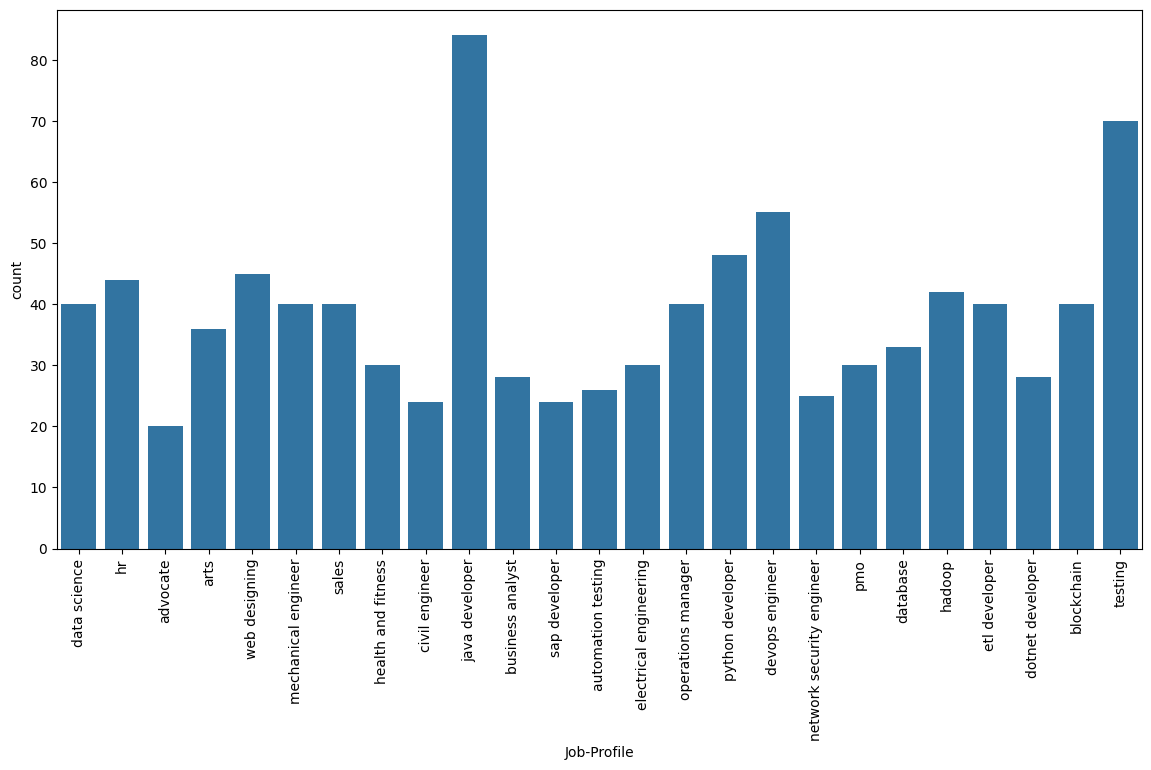

In [24]:
plt.figure(figsize = [14,7])
sns.countplot(x = resume_data['Job-Profile'])
plt.xticks(rotation=90)
plt.show()

Highest numbers of resumes are given by the java devlopers and database which also shows there popularity and demand in the market.

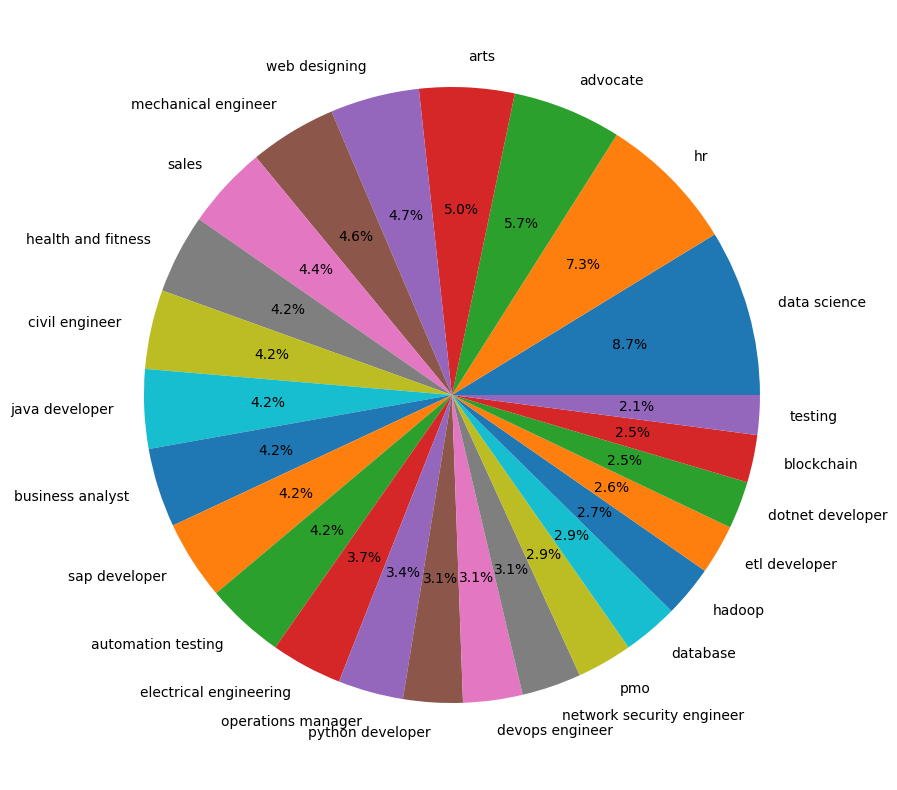

In [25]:
counts= resume_data['Job-Profile'].value_counts()
labels= resume_data['Job-Profile'].unique()
plt.figure(figsize=(15,10)) 
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer (stop_words='english') 

tfidf.fit(resume_data['Resume'])
requiredText = tfidf.transform(resume_data['Resume'])

In [27]:
resume_data['Category'] = resume_data['Job-Profile'] 

In [28]:
resume_data['Category'].unique()

array(['data science', 'hr', 'advocate', 'arts', 'web designing',
       'mechanical engineer', 'sales', 'health and fitness',
       'civil engineer', 'java developer', 'business analyst',
       'sap developer', 'automation testing', 'electrical engineering',
       'operations manager', 'python developer', 'devops engineer',
       'network security engineer', 'pmo', 'database', 'hadoop',
       'etl developer', 'dotnet developer', 'blockchain', 'testing'],
      dtype=object)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(requiredText , resume_data['Job-Profile'] , test_size=0.2, random_state=42)

In [32]:
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [34]:
ypred = model.predict(X_test)
ypred

array(['java developer', 'java developer', 'java developer', 'hadoop',
       'health and fitness', 'network security engineer',
       'mechanical engineer', 'automation testing', 'advocate',
       'health and fitness', 'hadoop', 'hr', 'mechanical engineer',
       'testing', 'python developer', 'civil engineer', 'data science',
       'business analyst', 'etl developer', 'dotnet developer', 'pmo',
       'arts', 'etl developer', 'testing', 'testing', 'sap developer',
       'sales', 'sales', 'automation testing', 'arts',
       'operations manager', 'arts', 'devops engineer', 'web designing',
       'electrical engineering', 'testing', 'data science', 'arts',
       'web designing', 'devops engineer', 'operations manager',
       'data science', 'devops engineer', 'pmo', 'web designing',
       'testing', 'sap developer', 'arts', 'java developer',
       'business analyst', 'java developer', 'sales',
       'electrical engineering', 'civil engineer', 'java developer',
       'hadoop

In [35]:
print (accuracy_score(y_test,ypred))

0.9585492227979274


In [37]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(model, open('model.pkl', 'wb'))